In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp

import pandas as pd

import matplotlib.pyplot as plt

c:\Users\loren\anaconda3\envs\TensorFlow\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
UKbirths = pd.read_csv("Data/UKbirths.csv")
UKbirths.head()

,time,BIRKENHEAD,BIRMINGHAM,BLACKPOOL,BOLTON,BOURNEMOUTH,BRADFORD,BRIGHTON,BRISTOL,CARDIFF,...,SHEFFIELD,SOUTHAMPTON,SOUTHEND,ST.HELENS,STOCKPORT,STOKE,SUNDERLAND,SWANSEA,WALSALL,WOLVERHAMPTON
0,1944,2479,20425,1862,2548,1850,4117,2178,7135,4055,...,8903,3231,1844,1976,2151,4966,3261,2312,1995,2819
1,1945,2758,21244,1896,2733,2002,4720,2520,7433,4481,...,9247,3554,2480,2126,2405,5347,3708,2549,2197,2831
2,1946,3272,23890,2221,3316,2197,6003,2902,8746,5226,...,10443,4037,3125,2513,2931,6204,4318,3194,2502,3246
3,1947,3190,22940,2179,3170,2055,5903,2734,8506,5068,...,9860,3975,2844,2544,2758,5937,4097,3121,2424,3278
4,1948,2876,20776,1883,2771,1780,5168,2339,7575,4783,...,8524,3516,2381,2147,2331,5256,3719,2760,2259,3007


In [3]:
UKbirths_array = np.transpose(np.array(UKbirths.drop(["time"], axis = 1).values))
UKbirths_array[0,:]

np.save("HEC/Data/Input/UKbirths_array.npy", UKbirths_array)

In [4]:
UKmeasles = pd.read_csv("Data/UKmeasles.csv")
UKmeasles.head()

,decimalYear,BIRKENHEAD,BIRMINGHAM,BLACKPOOL,BOLTON,BOURNEMOUTH,BRADFORD,BRIGHTON,BRISTOL,CARDIFF,...,SHEFFIELD,SOUTHAMPTON,SOUTHEND,ST.HELENS,STOCKPORT,STOKE,SUNDERLAND,SWANSEA,WALSALL,WOLVERHAMPTON
0,1944.000000,1,7,1,0,0,21,3,2,4,...,6,0,1,2,1,1,2,0,1,8
1,1944.038462,0,7,6,0,0,10,23,2,6,...,1,0,0,1,0,5,10,0,1,6
2,1944.076923,0,14,10,1,1,7,37,4,8,...,5,5,4,2,0,5,25,0,4,4
3,1944.115385,0,26,10,0,4,4,14,4,14,...,6,18,4,0,0,2,4,0,0,8
4,1944.153846,1,32,11,0,3,4,32,4,17,...,6,10,9,3,3,4,38,0,4,7


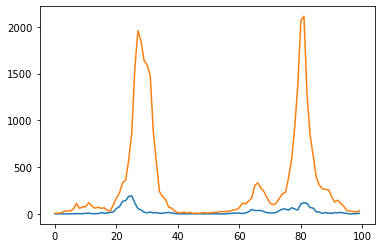

In [5]:
plt.plot(UKmeasles["BIRKENHEAD"][:100])
plt.plot(UKmeasles["BIRMINGHAM"][:100])

In [6]:
UKmeasles_array = np.transpose(np.array(UKmeasles.drop(["decimalYear"], axis = 1).values))
UKmeasles_array[1,:10]

np.save("HEC/Data/Input/UKmeasles_array.npy", UKmeasles_array)

In [7]:
UKmeasles_array.shape

(40, 546)

In [8]:
UKpop = pd.read_csv("Data/UKpop.csv")
UKpop.head()

,time,BIRKENHEAD,BIRMINGHAM,BLACKPOOL,BOLTON,BOURNEMOUTH,BRADFORD,BRIGHTON,BRISTOL,CARDIFF,...,SHEFFIELD,SOUTHAMPTON,SOUTHEND,ST.HELENS,STOCKPORT,STOKE,SUNDERLAND,SWANSEA,WALSALL,WOLVERHAMPTON
0,1944,118626,992574,146026,153709,123118,261403,122444,405988,215072,...,473569,129338,89543,98294,128785,250133,161288,137911,102747,146987
1,1945,121836,1002601,143741,153868,126803,262945,132441,414383,217525,...,476761,142654,108535,99239,129432,251637,165523,140110,102642,146899
2,1946,131564,1045307,150186,161230,134898,279243,146142,417189,224575,...,500755,160014,135257,104837,137767,265004,175915,149060,107344,152253
3,1947,135679,1072476,152105,164448,135862,283263,151167,425797,231249,...,510304,170180,144494,108242,138516,269667,176428,152681,109949,155968
4,1948,140356,1096415,151459,167031,137146,288587,154428,435133,240723,...,514417,178897,148324,110137,140935,273645,180673,158077,112632,159183


In [9]:
UKpop_array = np.transpose(np.array(UKpop.drop(["time"], axis = 1).values))
UKpop_array[1,:10]

np.save("HEC/Data/Input/UKpop_array.npy", UKpop_array)

In [10]:
measles_distance_matrix_array = pd.read_csv("Data/measles_distance_matrix.csv").values

np.save("HEC/Data/Input/measles_distance_matrix_array.npy", measles_distance_matrix_array)

In [52]:
UKbirths = tf.convert_to_tensor(UKbirths_array, dtype = tf.float32)
UKmeasles = tf.convert_to_tensor(UKmeasles_array, dtype = tf.float32)
UKpop = tf.convert_to_tensor(UKpop_array, dtype = tf.float32)
measles_distance_matrix = tf.convert_to_tensor(measles_distance_matrix_array, dtype = tf.float32)

In [53]:
%run -i measles_code.py

In [54]:
term   = tf.convert_to_tensor([6, 99, 115, 198, 252, 299, 308, 355, 366], dtype = tf.float32)
school = tf.convert_to_tensor([0, 1, 0, 1, 0, 1, 0, 1, 0], dtype = tf.float32)

In [55]:
n_cities = tf.constant(40, dtype = tf.int64)

pi_0_1 = 0.01
pi_0_2 = 0.00005
pi_0_3 = 0.00004
pi_0 = tf.convert_to_tensor([[pi_0_1, pi_0_2, pi_0_3, 1 - pi_0_1 - pi_0_2 - pi_0_3]], dtype = tf.float32)*tf.ones((n_cities, 4), dtype = tf.float32)

initial_pop = UKpop[:,0]

beta_bar  = tf.convert_to_tensor(np.random.normal(10, 0.5, (n_cities,1)), dtype = tf.float32)
rho   = tf.convert_to_tensor([[1/7]], dtype = tf.float32)*tf.ones((n_cities, 1), dtype = tf.float32)
gamma = tf.convert_to_tensor([[1/7]], dtype = tf.float32)*tf.ones((n_cities, 1), dtype = tf.float32)

g = tf.convert_to_tensor([[2500]], dtype = tf.float32)*tf.ones((n_cities, 1), dtype = tf.float32) #tf.convert_to_tensor(np.random.normal(150, 10, (n_cities,1)), dtype = tf.float32)

p = tf.constant(0.759, dtype = tf.float32)
a = tf.constant(0.3,   dtype = tf.float32)
c = tf.constant(0.4,   dtype = tf.float32)

Xi = tfp.distributions.Gamma(concentration = 50, rate = 50)
Q  = tfp.distributions.TruncatedNormal( 0.5, 0.1, 0, 1)

delta_year = tf.convert_to_tensor([[1/50]], dtype = tf.float32)*tf.ones((n_cities, 4), dtype = tf.float32)

In [56]:
intermediate_steps = 4
T = 600

is_school_term_array, is_start_school_year_array = school_term_and_school_year(T, intermediate_steps, term, school)

is_school_term_array = tf.convert_to_tensor(is_school_term_array, dtype = tf.float32)
is_start_school_year_array = tf.convert_to_tensor(is_start_school_year_array, dtype = tf.float32)

In [59]:
intermediate_steps = tf.constant(4, dtype = tf.float32)
h = tf.constant(14/tf.cast(intermediate_steps, dtype = tf.float32), dtype = tf.float32)
T = tf.constant(540, dtype = tf.float32)

X_t, Y_t = run(T, intermediate_steps, UKbirths, UKpop, g, measles_distance_matrix, initial_pop, pi_0, beta_bar, p, a, is_school_term_array, is_start_school_year_array, h, rho, gamma, Xi, Q, c, n_cities, delta_year)

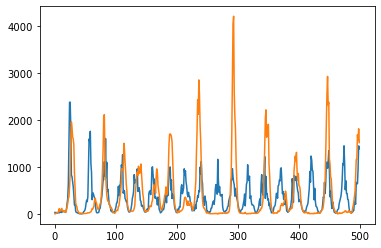

In [60]:
plt.plot(Y_t[:500,1,0])
plt.plot(UKmeasles[1,:500])

# PAL on synthetic?

In [61]:
synthetic_data = tf.transpose(Y_t[...,0])

In [62]:
%run -i measles_PAL.py

In [63]:
T=540

log_factorial_vec =  log_correction(T, synthetic_data)

In [64]:
T = 500

In [65]:
n_particles = 200

In [66]:
bar_lambda, likelihood, bar_Lambda = PAL_run(T, intermediate_steps, synthetic_data, UKbirths, UKpop, g, measles_distance_matrix, initial_pop, pi_0, beta_bar, p, a, is_school_term_array, is_start_school_year_array, log_factorial_vec, h, rho, gamma, Xi, Q, c, n_cities, n_particles, delta_year)

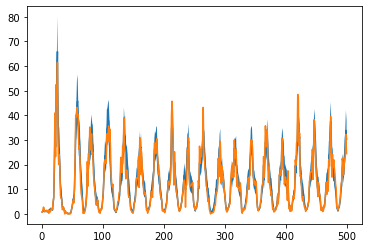

In [67]:
scaled_bar_Lambda_q = np.quantile(0.5*bar_Lambda, (0.05, 0.95), axis = 1)

times = tf.linspace(1, T, T)

plt.plot(times, 0.5*tf.reduce_mean(bar_Lambda, axis = 1)[:,0,2,3])
plt.fill_between(times, scaled_bar_Lambda_q[0,:,0,2,3], scaled_bar_Lambda_q[1,:,0,2,3])
plt.plot(times, synthetic_data[0,1:501]/4)

In [68]:
T = 540
n_particles=1000

In [69]:
like = PAL_run_likelihood(T, intermediate_steps, synthetic_data, UKbirths, UKpop, g, measles_distance_matrix, initial_pop, pi_0, beta_bar, p, a, is_school_term_array, is_start_school_year_array, log_factorial_vec, h, rho, gamma, Xi, Q, c, n_cities, n_particles, delta_year)


In [70]:
tf.reduce_mean(like)/2

<tf.Tensor: shape=(), dtype=float32, numpy=-175163.64>

In [71]:
like = PAL_run_likelihood_res(T, intermediate_steps, synthetic_data, UKbirths, UKpop, g, measles_distance_matrix, initial_pop, pi_0, beta_bar, p, a, is_school_term_array, is_start_school_year_array, log_factorial_vec, h, rho, gamma, Xi, Q, c, n_cities, n_particles, delta_year)


ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "c:\Users\loren\anaconda3\envs\TensorFlow\lib\site-packages\tensorflow\python\ops\control_flow_ops.py", line 2789, in while_loop
    return result  File "c:\Users\loren\anaconda3\envs\TensorFlow\lib\site-packages\tensorflow\python\ops\control_flow_ops.py", line 2745, in <lambda>
    body = lambda i, lv: (i + 1, orig_body(*lv))  File "c:\Users\loren\anaconda3\envs\TensorFlow\lib\site-packages\tensorflow\python\ops\functional_ops.py", line 655, in compute
    return (next_i, flat_a_out, tas)  File "c:\Users\loren\anaconda3\envs\TensorFlow\lib\site-packages\tensorflow\python\ops\functional_ops.py", line 650, in <listcomp>
    tas = [ta.write(i, value) for (ta, value) in zip(tas, flat_a_out)]  File "c:\Users\loren\anaconda3\envs\TensorFlow\lib\site-p

In [72]:
tf.reduce_mean(like)/2

<tf.Tensor: shape=(), dtype=float32, numpy=-38217.395>

In [74]:
np.std(like)

36.48207

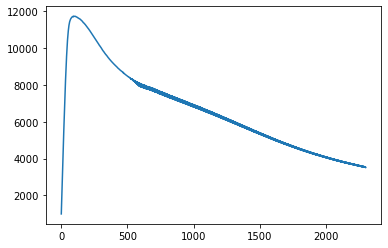

In [2]:
plt.plot(np.load("Experiments/Output_2/g_list.npy")[:,0,0])

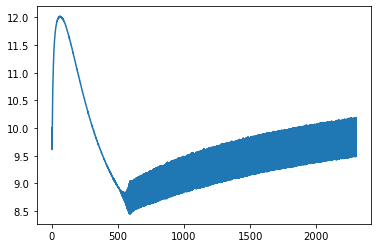

In [3]:
plt.plot(1/np.load("Experiments/Output_2/gamma_list.npy")[:,0,0])

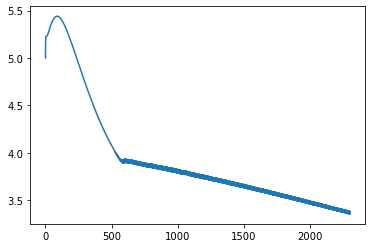

In [4]:
plt.plot(1/np.load("Experiments/Output_2/rho_list.npy")[:,0,0])

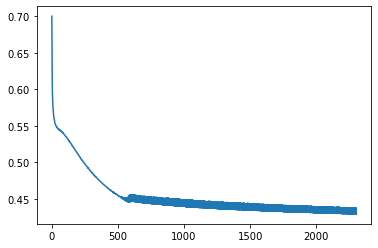

In [5]:
plt.plot(np.load("Experiments/Output_2/c_list.npy"))

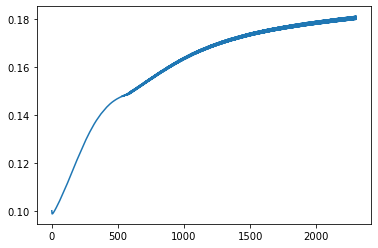

In [6]:
plt.plot(np.load("Experiments/Output_2/a_list.npy"))

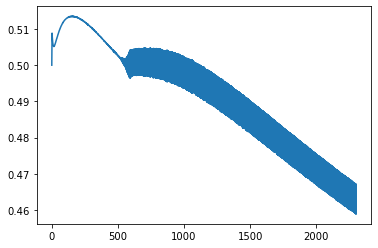

In [7]:
plt.plot(np.load("Experiments/Output_2/p_list.npy"))

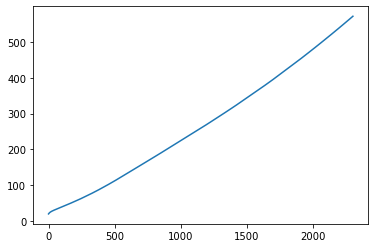

In [8]:
plt.plot(np.load("Experiments/Output_2/gamma_par_list.npy"))

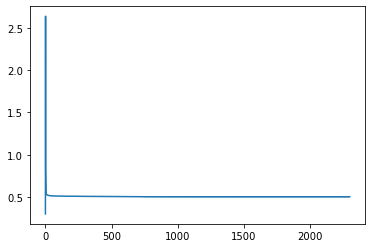

In [9]:
plt.plot(np.load("Experiments/Output_2/gauss_mean_par_list.npy")[:])

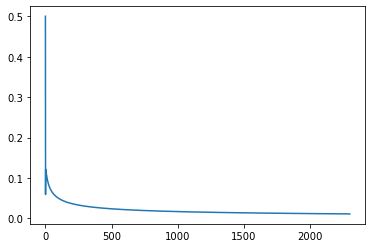

In [10]:
plt.plot(np.load("Experiments/Output_2/gauss_sigma_par_list.npy")[:])

In [181]:
like_list = []

for i in range(10):
    print(i)

    like = PAL_run_likelihood(T, intermediate_steps, synthetic_data, UKbirths, UKpop, g, measles_distance_matrix, initial_pop, pi_0, beta_bar, p, a, is_school_term_array, is_start_school_year_array, log_factorial_vec, h, rho, gamma, Xi, Q, c, n_cities, n_particles, delta_year)

    like_list.append(tf.reduce_mean(like))

0
1
2
3
4
5
6
7
8
9


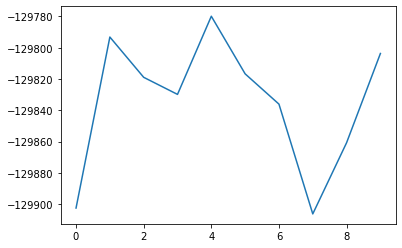

In [182]:
plt.plot(like_list)

In [172]:
g_grid = np.linspace(1, 21., 10)
like_list = []

for i in range(10):

    print(g_grid[i])
    g_grid_i = tf.convert_to_tensor([[1000*g_grid[i]]], dtype = tf.float32)*tf.ones((n_cities, 1), dtype = tf.float32)

    like = PAL_run_likelihood(T, intermediate_steps, synthetic_data, UKbirths, UKpop, g_grid_i, measles_distance_matrix, initial_pop, pi_0, beta_bar, p, a, is_school_term_array, is_start_school_year_array, log_factorial_vec, h, rho, gamma, Xi, Q, c, n_cities, n_particles, delta_year)

    like_list.append(tf.reduce_mean(like))


1.0
3.2222222222222223
5.444444444444445
7.666666666666667
9.88888888888889
12.11111111111111
14.333333333333334
16.555555555555557
18.77777777777778
21.0


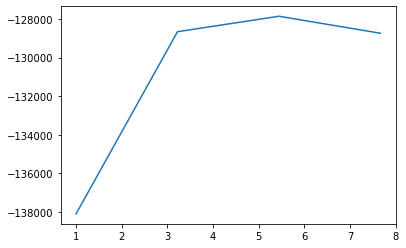

In [173]:
plt.plot(g_grid, like_list)

In [178]:
recover_time = np.linspace(1., 10., 10)
like_list = []

for i in range(10):

    print(recover_time[i])
    gamma_i = tf.convert_to_tensor([[1/recover_time[i]]], dtype = tf.float32)*tf.ones((n_cities, 1), dtype = tf.float32)

    like = PAL_run_likelihood(T, intermediate_steps, synthetic_data, UKbirths, UKpop, g, measles_distance_matrix, initial_pop, pi_0, beta_bar, p, a, is_school_term_array, is_start_school_year_array, log_factorial_vec, h, rho, gamma_i, Xi, Q, c, n_cities, n_particles, delta_year)

    like_list.append(tf.reduce_mean(like))

1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0


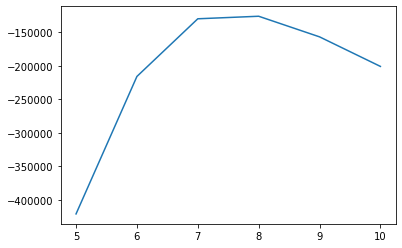

In [179]:
plt.plot(recover_time[4:], like_list[4:])

In [176]:
a_grid = np.linspace(.01, .6, 10)
like_list = []

for i in range(10):

    print(a_grid[i])
    a_grid_i = tf.constant(a_grid[i],   dtype = tf.float32)

    like = PAL_run_likelihood(T, intermediate_steps, synthetic_data, UKbirths, UKpop, g, measles_distance_matrix, initial_pop, pi_0, beta_bar, p, a_grid_i, is_school_term_array, is_start_school_year_array, log_factorial_vec, h, rho, gamma, Xi, Q, c, n_cities, n_particles, delta_year)

    like_list.append(tf.reduce_mean(like))
    

0.01
0.07555555555555554
0.1411111111111111
0.20666666666666667
0.2722222222222222
0.33777777777777773
0.4033333333333333
0.46888888888888886
0.5344444444444444
0.6


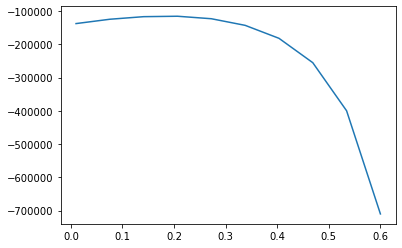

In [177]:
plt.plot(a_grid, like_list)

# Gradient synthetic

In [230]:
%run -i measles_PAL_grad.py

In [260]:
n_cities = tf.constant(40, dtype = tf.int64)

pi_0_1_init = 0.02
pi_0_2_init = 0.0005
pi_0_3_init = 0.0004
pi_0_init = tf.convert_to_tensor([[pi_0_1_init, pi_0_2_init, pi_0_3_init, 1 - pi_0_1_init - pi_0_2_init - pi_0_3_init]], dtype = tf.float32)
log_pi_0_init = tf.Variable(tf.math.log(pi_0_init))

initial_pop = UKpop[:,0]

beta_bar_init  = tf.convert_to_tensor(np.random.normal(7, 0.5, (n_cities,1)), dtype = tf.float32)
log_beta_bar_init  = tf.Variable(tf.math.log(beta_bar_init))

rho_init       = tf.convert_to_tensor([[1/5]], dtype = tf.float32)
log_rho_init       = tf.Variable(tf.math.log(rho_init))

gamma_init     = tf.convert_to_tensor([[1/10]], dtype = tf.float32)
log_gamma_init     = tf.Variable(tf.math.log(gamma_init))

g_init = tf.convert_to_tensor([[1000]], dtype = tf.float32)
log_g_init = tf.Variable(tf.math.log(g_init))

p_init = tf.constant(0.5, dtype = tf.float32)
log_p_init = tf.Variable(tf.math.log(p_init))

a_init = tf.constant(0.1,   dtype = tf.float32)
log_a_init = tf.Variable(tf.math.log(a_init))

c_init = tf.constant(0.7,   dtype = tf.float32)
log_c_init = tf.Variable(tf.math.log(c_init))

gamma_par_init = tf.constant(20,   dtype = tf.float32)
log_gamma_par_init = tf.Variable(tf.math.log(gamma_par_init))

gauss_mean_par_init = tf.constant(0.3,   dtype = tf.float32)
log_gauss_mean_par_init = tf.Variable(tf.math.log(gauss_mean_par_init))

gauss_sigma_par_init = tf.constant(0.5,   dtype = tf.float32)
log_gauss_sigma_par_init = tf.Variable(tf.math.log(gauss_sigma_par_init))

delta_year = tf.convert_to_tensor([[1/50]], dtype = tf.float32)*tf.ones((n_cities, 4), dtype = tf.float32)

In [261]:
pi_0_list =[]
pi_0_list.append(tf.math.exp(log_pi_0_init.numpy()))

beta_bar_list =[]
beta_bar_list.append(tf.math.exp(log_beta_bar_init.numpy()))

rho_list =[]
rho_list.append(tf.math.exp(log_rho_init.numpy()))

gamma_list =[]
gamma_list.append(tf.math.exp(log_gamma_init.numpy()))

g_list =[]
g_list.append(tf.math.exp(log_g_init.numpy()))

p_list =[]
p_list.append(tf.math.exp(log_p_init.numpy()))

a_list =[]
a_list.append(tf.math.exp(log_a_init.numpy()))

c_list =[]
c_list.append(tf.math.exp(log_c_init.numpy()))

gamma_par_list =[]
gamma_par_list.append(tf.math.exp(log_gamma_par_init.numpy()))

gauss_mean_par_list =[]
gauss_mean_par_list.append(tf.math.exp(log_gauss_mean_par_init.numpy()))

gauss_sigma_par_list =[]
gauss_sigma_par_list.append(tf.math.exp(log_gauss_sigma_par_init.numpy()))


In [262]:
n_particles = 100
T = 200

loss_list = []

In [294]:

for iter in range(1):

    with tf.GradientTape() as tape:
        pi_0_init = tf.math.exp(log_pi_0_init)
        beta_bar_init = tf.math.exp(log_beta_bar_init)
        rho_init = tf.math.exp(log_rho_init)
        gamma_init = tf.math.exp(log_gamma_init)
        g_init = tf.math.exp(log_g_init)
        p_init = tf.math.exp(log_p_init)
        a_init = tf.math.exp(log_a_init)
        c_init = tf.math.exp(log_c_init)
        gamma_par_init = tf.math.exp(log_gamma_par_init)
        gauss_mean_par_init = tf.math.exp(log_gauss_mean_par_init)
        gauss_sigma_par_init = tf.math.exp(log_gauss_sigma_par_init)
        
        Xi = tfp.distributions.Gamma(concentration = gamma_par_init, rate = gamma_par_init)
        Q  = tfp.distributions.TruncatedNormal( gauss_mean_par_init, gauss_sigma_par_init, 0, 1)

        pi_0_init_transform = pi_0_init*tf.ones((n_cities, 4), dtype = tf.float32)
        rho_init_transform  = rho_init*tf.ones((n_cities, 1), dtype = tf.float32)
        gamma_init_transform = gamma_init*tf.ones((n_cities, 1), dtype = tf.float32)
        g_init_transform = g_init*tf.ones((n_cities, 1), dtype = tf.float32)

        like = PAL_run_likelihood_grad(T, intermediate_steps, synthetic_data, UKbirths, UKpop, g_init_transform, measles_distance_matrix, initial_pop, pi_0_init_transform, beta_bar_init, p_init, a_init, is_school_term_array, is_start_school_year_array, log_factorial_vec, h, rho_init_transform, gamma_init_transform, Xi, Q, c_init, n_cities, n_particles, delta_year)
        loss = -tf.reduce_mean(like)/T

    print(loss)
    loss_list.append(loss)

    grad_param_list = tape.gradient(loss, [log_pi_0_init, log_beta_bar_init, log_rho_init, log_gamma_init, log_g_init, log_p_init, log_a_init, log_c_init, log_gamma_par_init, log_gauss_mean_par_init, log_gauss_sigma_par_init])

    pi_0_init_updated = tf.math.exp(log_pi_0_init - 1e-4*grad_param_list[0])
    new_log_pi_3 = tf.math.log(1-tf.reduce_sum(pi_0_init_updated[0,:3]))
    log_pi_0_init_updated = tf.math.log(pi_0_init_updated)*tf.convert_to_tensor([[1, 1, 1, 0]], dtype = tf.float32) + new_log_pi_3*tf.convert_to_tensor([[0, 0, 0, 1]], dtype = tf.float32)
    log_pi_0_init     = tf.Variable(log_pi_0_init_updated)

    log_beta_bar_init = tf.Variable(log_beta_bar_init - grad_param_list[1]*1e-3)
    log_rho_init      = tf.Variable(log_rho_init      - grad_param_list[2]*1e-4)
    log_gamma_init    = tf.Variable(log_gamma_init    - grad_param_list[3]*1e-4)

    log_g_init = tf.Variable(log_g_init - grad_param_list[4]*1e-3)
    log_p_init = tf.Variable(log_p_init - grad_param_list[5]*1e-4)
    log_a_init = tf.Variable(log_a_init - grad_param_list[6]*1e-4)
    log_c_init = tf.Variable(log_c_init - grad_param_list[7]*1e-4)

    log_gamma_par_init       = tf.Variable(log_gamma_par_init       - grad_param_list[8]*1e-4)
    log_gauss_mean_par_init  = tf.Variable(log_gauss_mean_par_init  - grad_param_list[9]*1e-4)
    log_gauss_sigma_par_init = tf.Variable(log_gauss_sigma_par_init - grad_param_list[10]*1e-4)


    pi_0_list.append(tf.math.exp(log_pi_0_init.numpy()))
    beta_bar_list.append(tf.math.exp(log_beta_bar_init.numpy()))
    rho_list.append(tf.math.exp(log_rho_init.numpy()))
    gamma_list.append(tf.math.exp(log_gamma_init.numpy()))    
    g_list.append(tf.math.exp(log_g_init.numpy()))
    p_list.append(tf.math.exp(log_p_init.numpy()))
    a_list.append(tf.math.exp(log_a_init.numpy()))
    c_list.append(tf.math.exp(log_c_init.numpy()))
    gamma_par_list.append(tf.math.exp(log_gamma_par_init.numpy()))
    gauss_mean_par_list.append(tf.math.exp(log_gauss_mean_par_init.numpy()))
    gauss_sigma_par_list.append(tf.math.exp(log_gauss_sigma_par_init.numpy()))

tf.Tensor(851.43677, shape=(), dtype=float32)


In [302]:
600*400/2


120000.0

In [241]:
np.array(pi_0_list).shape

(4, 1, 4)

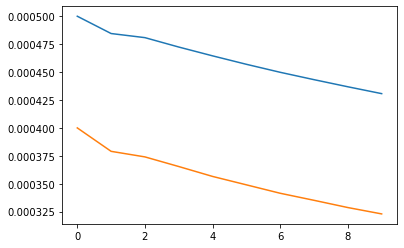

In [295]:
for i in range(1,3):
    plt.plot(np.array(pi_0_list)[:,0,i])

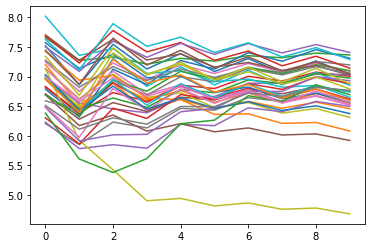

In [296]:
for i in range(40):
    plt.plot(np.array(beta_bar_list)[:,i])

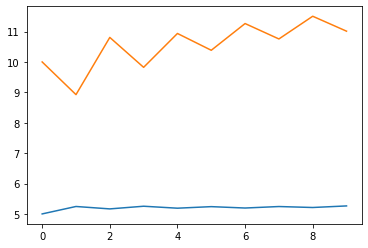

In [297]:
plt.plot(1/np.array(rho_list)[:,0,0])
plt.plot(1/np.array(gamma_list)[:,0,0])
# plt.plot(np.array(p_list)[:])

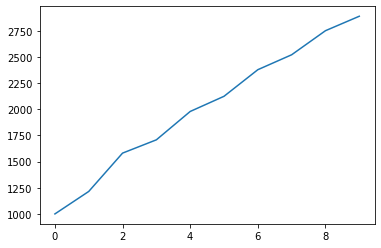

In [298]:
plt.plot(np.array(g_list)[:,0,0])

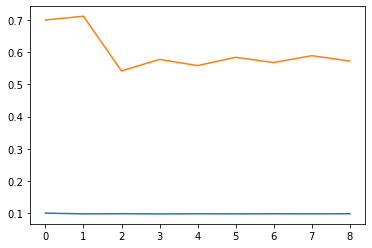

In [293]:
# plt.plot(np.array(p_list)[:])
plt.plot(np.array(a_list)[:])
plt.plot(np.array(c_list)[:])

In [205]:
log_g_init

<tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[8.887098]], dtype=float32)>

In [206]:
tf.math.exp(log_g_init.numpy())

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[7237.9863]], dtype=float32)>

In [208]:
1/tf.math.exp(log_rho_init.numpy())

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[5.158353]], dtype=float32)>

In [209]:
1/tf.math.exp(log_gamma_init.numpy())

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[10.061539]], dtype=float32)>

In [217]:
grad_param_list[2:]

[<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-115.86246]], dtype=float32)>,
 <tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[864.8543]], dtype=float32)>,
 <tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-70.52298]], dtype=float32)>,
 <tf.Tensor: shape=(), dtype=float32, numpy=109.89684>,
 <tf.Tensor: shape=(), dtype=float32, numpy=-40.964855>,
 <tf.Tensor: shape=(), dtype=float32, numpy=360.20364>,
 <tf.Tensor: shape=(), dtype=float32, numpy=-114.034546>,
 <tf.Tensor: shape=(), dtype=float32, numpy=610.3748>,
 <tf.Tensor: shape=(), dtype=float32, numpy=291.54324>]

In [24]:
np.load("Experiments/Output_2/pi_0_list.npy").shape

(9902, 1, 4)

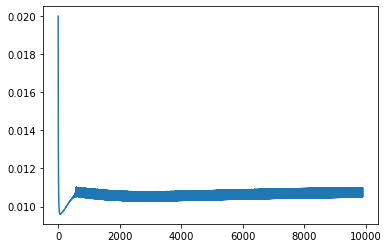

In [28]:
for i in range(1):
    plt.plot(np.load("Experiments/Output_2/pi_0_list.npy")[:,0,i])

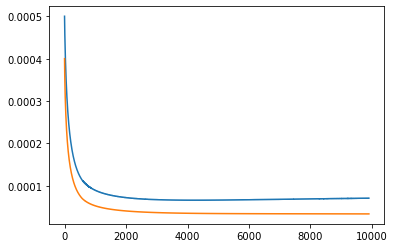

In [29]:
for i in range(1,3):
    plt.plot(np.load("Experiments/Output_2/pi_0_list.npy")[:,0,i])

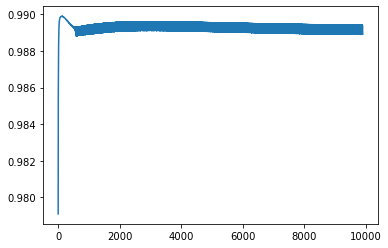

In [30]:
for i in range(3,4):
    plt.plot(np.load("Experiments/Output_2/pi_0_list.npy")[:,0,i])

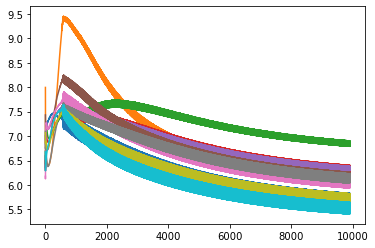

In [23]:
for i in range(10):
    plt.plot(np.load("Experiments/Output_2/beta_bar_list.npy")[:,i,:])

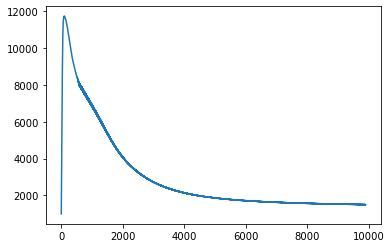

In [12]:
plt.plot(np.load("Experiments/Output_2/g_list.npy")[:,0,0])

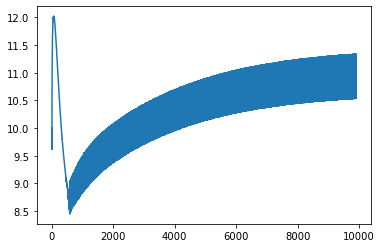

In [13]:
plt.plot(1/np.load("Experiments/Output_2/gamma_list.npy")[:,0,0])

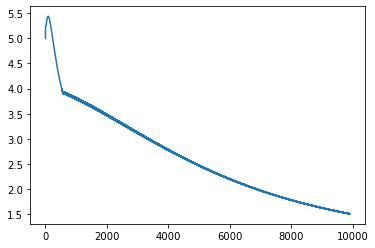

In [14]:
plt.plot(1/np.load("Experiments/Output_2/rho_list.npy")[:,0,0])

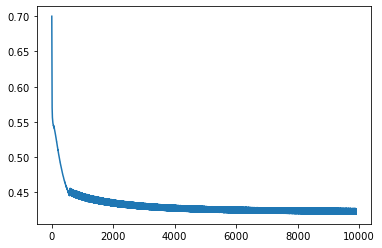

In [15]:
plt.plot(np.load("Experiments/Output_2/c_list.npy"))

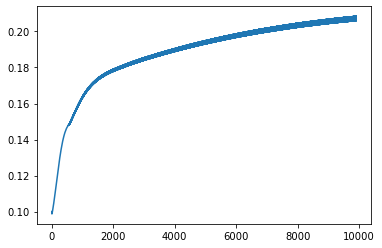

In [16]:
plt.plot(np.load("Experiments/Output_2/a_list.npy"))

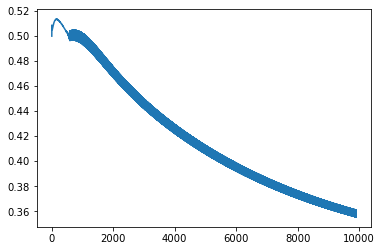

In [17]:
plt.plot(np.load("Experiments/Output_2/p_list.npy"))

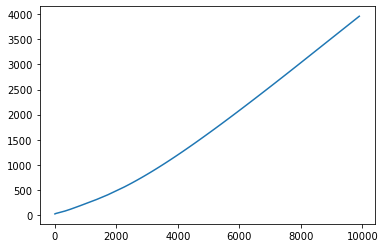

In [18]:
plt.plot(np.load("Experiments/Output_2/gamma_par_list.npy"))

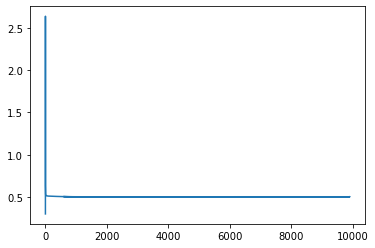

In [19]:
plt.plot(np.load("Experiments/Output_2/gauss_mean_par_list.npy")[:])

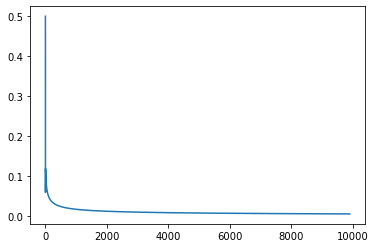

In [20]:
plt.plot(np.load("Experiments/Output_2/gauss_sigma_par_list.npy")[:])

# PAL

In [ ]:
%run -i measles_PAL.py

In [ ]:
n_particles = 100
T = 500

In [ ]:
log_factorial_vec =  log_correction(T, UKmeasles)

In [ ]:
n_particles = 100
T = 500

In [ ]:
bar_lambda, likelihood, bar_Lambda = PAL_run(T, intermediate_steps, UKmeasles, UKbirths, UKpop, g, measles_distance_matrix, initial_pop, pi_0, beta_bar, p, a, is_school_term_array, is_start_school_year_array, log_factorial_vec, h, rho, gamma, Xi, Q, c, n_cities, n_particles, delta_year)

In [ ]:
plt.plot(0.5*tf.reduce_mean(bar_Lambda, axis = 1)[:,0,2,3])
plt.plot(UKmeasles[0,1:500]/4)

In [ ]:
n_particles = 10000
T = 500

like = PAL_run_likelihood(T, intermediate_steps, UKmeasles, UKbirths, UKpop, g, measles_distance_matrix, initial_pop, pi_0, beta_bar, p, a, is_school_term_array, is_start_school_year_array, log_factorial_vec, h, rho, gamma, Xi, Q, c, n_cities, n_particles, delta_year)

In [ ]:
like/2

# Gradient

In [ ]:
n_cities = tf.constant(40, dtype = tf.int64)

pi_0_1_init = 0.01
pi_0_2_init = 0.00005
pi_0_3_init = 0.00004
pi_0_init = tf.convert_to_tensor([[pi_0_1_init, pi_0_2_init, pi_0_3_init, 1 - pi_0_1_init - pi_0_2_init - pi_0_3_init]], dtype = tf.float32)
log_pi_0_init = tf.Variable(tf.math.log(pi_0_init))

initial_pop = UKpop[:,0]

beta_bar_init  = tf.convert_to_tensor(np.random.normal(7, 0.5, (n_cities,1)), dtype = tf.float32)
log_beta_bar_init  = tf.Variable(tf.math.log(beta_bar_init))

rho_init       = tf.convert_to_tensor([[1/5]], dtype = tf.float32)
log_rho_init       = tf.Variable(tf.math.log(rho_init))

gamma_init     = tf.convert_to_tensor([[1/10]], dtype = tf.float32)
log_gamma_init     = tf.Variable(tf.math.log(gamma_init))

g_init = tf.convert_to_tensor(np.random.normal(250, 10, (n_cities,1)), dtype = tf.float32)
log_g_init = tf.Variable(tf.math.log(g_init))

p_init = tf.constant(0.5, dtype = tf.float32)
log_p_init = tf.Variable(tf.math.log(p_init))

a_init = tf.constant(0.1,   dtype = tf.float32)
log_a_init = tf.Variable(tf.math.log(a_init))

c_init = tf.constant(0.7,   dtype = tf.float32)
log_c_init = tf.Variable(tf.math.log(c_init))

gamma_par_init = tf.constant(20,   dtype = tf.float32)
log_gamma_par_init = tf.Variable(tf.math.log(gamma_par_init))

gauss_mean_par_init = tf.constant(0.3,   dtype = tf.float32)
log_gauss_mean_par_init = tf.Variable(tf.math.log(gauss_mean_par_init))

gauss_sigma_par_init = tf.constant(0.5,   dtype = tf.float32)
log_gauss_sigma_par_init = tf.Variable(tf.math.log(gauss_sigma_par_init))

delta_year = tf.convert_to_tensor([[1/50]], dtype = tf.float32)*tf.ones((n_cities, 4), dtype = tf.float32)

In [ ]:
%run -i measles_PAL_grad.py

In [ ]:
pi_0_list =[]
pi_0_list.append(tf.math.exp(log_pi_0_init.numpy()))

beta_bar_list =[]
beta_bar_list.append(tf.math.exp(log_beta_bar_init.numpy()))

rho_list =[]
rho_list.append(tf.math.exp(log_rho_init.numpy()))

gamma_list =[]
gamma_list.append(tf.math.exp(log_gamma_init.numpy()))

g_list =[]
g_list.append(tf.math.exp(log_g_init.numpy()))

p_list =[]
p_list.append(tf.math.exp(log_p_init.numpy()))

a_list =[]
a_list.append(tf.math.exp(log_a_init.numpy()))

c_list =[]
c_list.append(tf.math.exp(log_c_init.numpy()))

gamma_par_list =[]
gamma_par_list.append(tf.math.exp(log_gamma_par_init.numpy()))

gauss_mean_par_list =[]
gauss_mean_par_list.append(tf.math.exp(log_gauss_mean_par_init.numpy()))

gauss_sigma_par_list =[]
gauss_sigma_par_list.append(tf.math.exp(log_gauss_sigma_par_init.numpy()))


In [ ]:
n_particles = 100
T = 200

In [ ]:
loss_list = []

In [ ]:

for iter in range(100):

    with tf.GradientTape() as tape:
        pi_0_init = tf.math.exp(log_pi_0_init)
        beta_bar_init = tf.math.exp(log_beta_bar_init)
        rho_init = tf.math.exp(log_rho_init)
        gamma_init = tf.math.exp(log_gamma_init)
        g_init = tf.math.exp(log_g_init)
        p_init = tf.math.exp(log_p_init)
        a_init = tf.math.exp(log_a_init)
        c_init = tf.math.exp(log_c_init)
        gamma_par_init = tf.math.exp(log_gamma_par_init)
        gauss_mean_par_init = tf.math.exp(log_gauss_mean_par_init)
        gauss_sigma_par_init = tf.math.exp(log_gauss_sigma_par_init)
        
        Xi = tfp.distributions.Gamma(concentration = gamma_par_init, rate = gamma_par_init)
        Q  = tfp.distributions.TruncatedNormal( gauss_mean_par_init, gauss_sigma_par_init, 0, 1)

        pi_0_init_transform = pi_0_init*tf.ones((n_cities, 4), dtype = tf.float32)
        rho_init_transform  = rho_init*tf.ones((n_cities, 1), dtype = tf.float32)
        gamma_init_transform = gamma_init*tf.ones((n_cities, 1), dtype = tf.float32)

        like = PAL_run_likelihood_grad(T, intermediate_steps, UKmeasles, UKbirths, UKpop, g_init, measles_distance_matrix, initial_pop, pi_0_init_transform, beta_bar_init, p_init, a_init, is_school_term_array, is_start_school_year_array, log_factorial_vec, h, rho_init_transform, gamma_init_transform, Xi, Q, c_init, n_cities, n_particles, delta_year)
        loss = -tf.reduce_mean(like)/T

    print(loss)
    loss_list.append(loss)

    grad_param_list = tape.gradient(loss, [log_pi_0_init, log_beta_bar_init, log_rho_init, log_gamma_init, log_g_init, log_p_init, log_a_init, log_c_init, log_gamma_par_init, log_gauss_mean_par_init, log_gauss_sigma_par_init])

    pi_0_init_updated = tf.math.exp(log_pi_0_init - 1e-4*grad_param_list[0])
    new_log_pi_3 = tf.math.log(1-tf.reduce_sum(pi_0_init_updated[0,:3]))
    log_pi_0_init_updated = tf.math.log(pi_0_init_updated)*tf.convert_to_tensor([[1, 1, 1, 0]], dtype = tf.float32) + new_log_pi_3*tf.convert_to_tensor([[0, 0, 0, 1]], dtype = tf.float32)
    log_pi_0_init     = tf.Variable(log_pi_0_init_updated)

    log_beta_bar_init = tf.Variable(log_beta_bar_init - grad_param_list[1]*1e-4)
    log_rho_init      = tf.Variable(log_rho_init      - grad_param_list[2]*1e-4)
    log_gamma_init    = tf.Variable(log_gamma_init    - grad_param_list[3]*1e-4)

    log_g_init = tf.Variable(log_g_init - grad_param_list[4]*1e-2)
    log_p_init = tf.Variable(log_p_init - grad_param_list[5]*1e-4)
    log_a_init = tf.Variable(log_a_init - grad_param_list[6]*1e-4)
    log_c_init = tf.Variable(log_c_init - grad_param_list[7]*1e-4)

    log_gamma_par_init       = tf.Variable(log_gamma_par_init       - grad_param_list[8]*1e-4)
    log_gauss_mean_par_init  = tf.Variable(log_gauss_mean_par_init  - grad_param_list[9]*1e-4)
    log_gauss_sigma_par_init = tf.Variable(log_gauss_sigma_par_init - grad_param_list[10]*1e-4)


    pi_0_list.append(tf.math.exp(log_pi_0_init.numpy()))
    beta_bar_list.append(tf.math.exp(log_beta_bar_init.numpy()))
    rho_list.append(tf.math.exp(log_rho_init.numpy()))
    gamma_list.append(tf.math.exp(log_gamma_init.numpy()))
    g_list.append(tf.math.exp(log_g_init.numpy()))
    p_list.append(tf.math.exp(log_p_init.numpy()))
    a_list.append(tf.math.exp(log_a_init.numpy()))
    c_list.append(tf.math.exp(log_c_init.numpy()))
    gamma_par_list.append(tf.math.exp(log_gamma_par_init.numpy()))
    gauss_mean_par_list.append(tf.math.exp(log_gauss_mean_par_init.numpy()))
    gauss_sigma_par_list.append(tf.math.exp(log_gauss_sigma_par_init.numpy()))

In [ ]:
plt.plot(np.array(loss_list))

In [ ]:
for i in range(40):
    plt.plot(np.array(g_list)[:,i,0])

In [ ]:
tf.reduce_min(np.array(g_list))

In [ ]:
plt.plot(1/np.array(rho_list)[:,0])

In [ ]:
plt.plot(1/np.array(gamma_list)[:,0])

In [ ]:
plt.plot(np.array(a_list))

In [ ]:
a

In [ ]:
plt.plot(np.array(c_list))

In [ ]:
c

In [ ]:
plt.plot(np.array(p_list))

In [ ]:
p